In [ ]:
import pandas as pd

In [ ]:
# orders_qu.csv
url = "https://drive.google.com/file/d/16W8DmCdO56q5808tHvsqTmjA_Eq-NelG/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1Hhux3-_tM9ix6UKbOG027SbLzrWjMwQU/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_qu = pd.read_csv(path)

In [ ]:
#orders_qu = orders_cl.copy()
#orderlines_qu = orderlines_cl.copy()
#products_qu = products_cl.copy()

In [ ]:
orders_qu["order_id"].nunique(), orderlines_qu["id_order"].nunique()

(40985, 40985)

In [ ]:
orders_qu

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
40980,527042,2018-03-14 11:47:50,18.98,Completed
40981,527070,2018-03-14 11:50:48,24.97,Completed
40982,527074,2018-03-14 11:51:42,24.97,Completed
40983,527096,2018-03-14 11:58:40,34.96,Completed


In [ ]:
orders_qu.state.value_counts()

,count
state,
Completed,40985


1. What is the time period that the dataset covers?

2. What is the overall revenue for that time?

3. Are there seasonal patterns in the evolution of sales?

4. What are the most sold products?

5. What are the products that generate the most revenue?

In [ ]:
# 1. What is the time period that the dataset covers?

In [ ]:
orders_qu.loc[:,'created_date'].min()

'2017-01-01 01:51:47'

In [ ]:
orders_qu.loc[:,'created_date'].max()

'2018-03-14 12:03:52'

In [ ]:
start_date= orderlines_qu.loc[:, 'date'].min()
start_date

In [ ]:
end_date= orderlines_qu.loc[:, 'date'].max()
end_date

In [ ]:
print(f"The dataset covers the period from {start_date} to {end_date}.")

In [ ]:
# 2.What is the overall revenue for that time?

In [ ]:
orders_qu.loc[:,'total_paid'].sum().round()

7978676.0

In [ ]:
# 3.Are there seasonal patterns in the evolution of sales?

In [ ]:
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      40985 non-null  int64  
 1   created_date  40985 non-null  object 
 2   total_paid    40985 non-null  float64
 3   state         40985 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [ ]:
orders_qu['created_date'] = pd.to_datetime(orders_qu['created_date'])

In [ ]:
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      40985 non-null  int64         
 1   created_date  40985 non-null  datetime64[ns]
 2   total_paid    40985 non-null  float64       
 3   state         40985 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
# Extract the month and year from the created_date

In [ ]:
orders_qu['month_year']= orders_qu['created_date'].dt.to_period('M')

In [ ]:
orders_qu

,order_id,created_date,total_paid,state,month_year
0,241423,2017-11-06 13:10:02,136.15,Completed,2017-11
1,242832,2017-12-31 17:40:03,15.76,Completed,2017-12
2,243330,2017-02-16 10:59:38,84.98,Completed,2017-02
3,245275,2017-06-28 11:35:37,149.00,Completed,2017-06
4,245595,2017-01-21 12:52:47,112.97,Completed,2017-01
...,...,...,...,...,...
40980,527042,2018-03-14 11:47:50,18.98,Completed,2018-03
40981,527070,2018-03-14 11:50:48,24.97,Completed,2018-03
40982,527074,2018-03-14 11:51:42,24.97,Completed,2018-03
40983,527096,2018-03-14 11:58:40,34.96,Completed,2018-03


In [ ]:
# group by month and year, then summ the total_paid

In [ ]:
monthly_totals= orders_qu.groupby('month_year')['total_paid'].sum().reset_index()

In [ ]:
monthly_totals

,month_year,total_paid
0,2017-01,620623.31
1,2017-02,341848.26
2,2017-03,24976.81
3,2017-04,230994.54
4,2017-05,333930.28
5,2017-06,292248.33
6,2017-07,610519.07
7,2017-08,385907.56
8,2017-09,395974.90
9,2017-10,558111.08


In [ ]:
# Plot the data

In [ ]:
import matplotlib.pyplot as plt

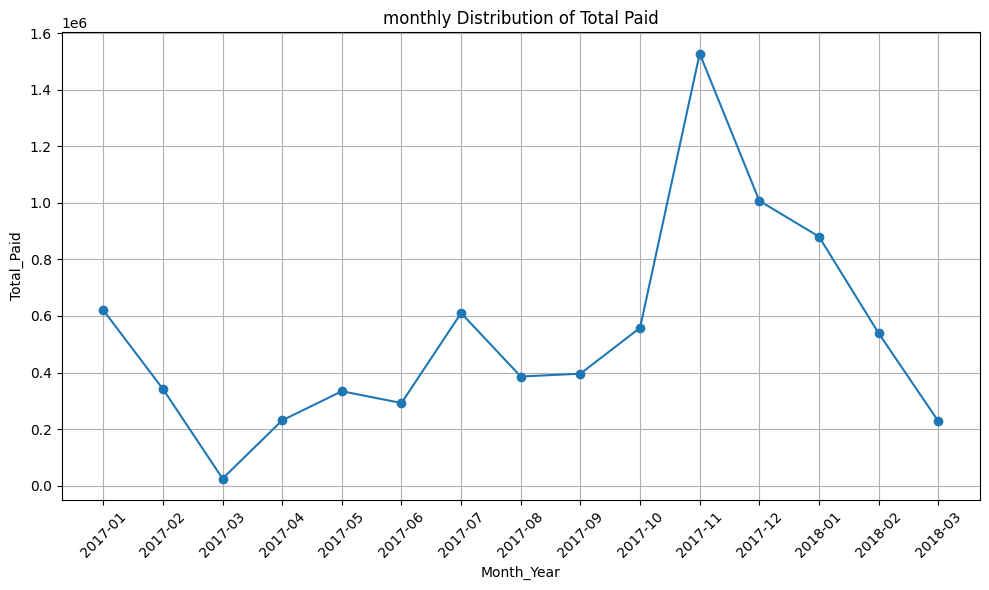

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_totals['month_year'].astype(str), monthly_totals['total_paid'],marker= 'o');
plt.title('monthly Distribution of Total Paid')
plt.xlabel('Month_Year')
plt.ylabel('Total_Paid')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#4.What are the most sold products?

In [ ]:
orderlines_qu

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [ ]:
# Group by sku and sum the product_quantity

In [ ]:
products_sales= orderlines_qu.groupby('sku')['product_quantity'].sum()

In [ ]:
# Sort the products by the total quantity sold in descending order
most_sold_products= products_sales.sort_values(ascending=False)
most_sold_products.head(30)

,product_quantity
sku,
APP1190,955
APP0698,820
APP1922,537
APP0927,489
WDT0183,476
SAM0074,329
CRU0051,328
APP2446,270
NTE0013,252


In [ ]:
#mergin to display the name of the items

In [ ]:
merged_data= pd.merge(most_sold_products,products_qu, on='sku')
merged_data.head(30)

,sku,product_quantity,name,desc,price,in_stock,type
0,APP1190,955,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.00,1,1231
1,APP0698,820,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230
2,APP1922,537,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple AirPods wireless headsets and cargo tran...,179.00,1,5384
3,APP0927,489,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384
4,WDT0183,476,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,169.00,1,12655397
5,SAM0074,329,Samsung 850 EVO SSD Disk 500GB,SSD hard drive Mac and PC 25 inch 500GB SATA I...,179.99,1,12215397
6,CRU0051,328,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397
7,APP2446,270,Apple iPhone 6 32GB Space Gray,New iPhone 6 32GB Space Gray,449.33,0,21561716
8,NTE0013,252,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",Adapter HDD / SSD 2.5 SATA 3.5 compatible with...,26.99,1,12755395
9,CRU0050,248,Crucial MX300 275GB SSD Disk,SSD 275GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,98.39,0,12215397


In [ ]:
#5.What are the products that generate the most revenue?

In [ ]:
orderlines_qu.head(30)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
5,1119154,299563,0,1,BEA0065,256.49,2017-01-01 02:42:05
6,1119155,299564,0,1,SAT0010,18.99,2017-01-01 02:43:37
7,1119181,299571,0,1,SYN0139,166.24,2017-01-01 04:00:44
8,1119188,299578,0,1,LOG0191,142.49,2017-01-01 08:21:26
9,1119189,299579,0,1,LGE0031-A,127.08,2017-01-01 08:23:14


In [ ]:
# Calculate total revenue for each product

In [ ]:
orderlines_qu['total_revenue']= orderlines_qu['product_quantity'] * orderlines_qu['unit_price']
orderlines_qu

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_revenue
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49
...,...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


In [ ]:
# Group by SKU and sum the total revenue

In [ ]:
most_revenue_product= orderlines_qu.groupby('sku')['total_revenue'].sum().sort_values(ascending=False).head(30)

In [ ]:
most_revenue_product

,total_revenue
sku,
LGE0044,135375.83
APP2446,104560.64
APP1922,86473.26
APP2477,85301.93
APP1970,80715.76
APP2072,74964.06
APP2485,70721.79
WDT0183,65589.96
APP2483,60090.08


In [ ]:
#merged to display the name of the items

In [ ]:
merged_data= pd.merge(most_revenue_product,products_qu, on='sku')
merged_data.head(30)

,sku,total_revenue,name,desc,price,in_stock,type
0,LGE0044,135375.83,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",99% Professional Monitor sRGB color calibrator...,599.00,1,1296
1,APP2446,104560.64,Apple iPhone 6 32GB Space Gray,New iPhone 6 32GB Space Gray,449.33,0,21561716
2,APP1922,86473.26,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple AirPods wireless headsets and cargo tran...,179.00,1,5384
3,APP2477,85301.93,Apple iPhone 64GB Space Gray 8,Apple iPhone 64GB 8 Color Space Gray,809.00,1,113291716
4,APP1970,80715.76,Apple iPhone 32GB Space Gray,New iPhone SE with 4-inch screen 32 free GB.,419.00,0,51601716
5,APP2072,74964.06,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM ...",laptop MacBook Air 13 inch i5 18GHz 8GB RAM an...,1105.59,1,"2,17E+11"
6,APP2485,70721.79,Apple iPhone 8 Plus 64GB Gold,Apple iPhone 8 Plus 64GB Gold color,919.00,0,113281716
7,WDT0183,65589.96,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,169.00,1,12655397
8,APP2483,60090.08,Apple iPhone 8 Plus 64GB Space Gray,Apple iPhone 8 Plus 64GB Space Gray,919.00,1,113281716
9,APP2479,52981.19,Apple iPhone 64GB Gold 8,Apple iPhone 64GB 8 in Gold,809.00,1,113291716


In [ ]:
#Analyze discounts

In [ ]:
#products sold are stored in the orderlines table.

In [ ]:
orderlines_qu

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_revenue
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49
...,...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


In [ ]:
products_qu

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364
...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392


In [ ]:
merged_data= pd.merge(orderlines_qu,products_qu, on='sku')

In [ ]:
merged_data

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_revenue,name,desc,price,in_stock,type
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1647280,526003,0,1,NET0028,404.99,2018-03-12 15:59:19,404.99,Netgear Wifi Orbi System kit and satellite net...,System RBK50 Mesh WiFi network kit compact and...,429.99,0,1334
53227,1647425,526066,0,1,WAC0254,83.99,2018-03-12 17:45:42,83.99,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405
53228,1647495,526093,0,1,WAC0252,83.99,2018-03-12 18:32:29,83.99,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405
53229,1648399,526440,0,1,PAC2235,878.18,2018-03-13 15:08:27,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (...,NAS storage server integrated with special foc...,1124.98,1,12175397


In [ ]:
#Discounts = difference between orderlines.unit_price and products.price. Merging both tables and creating a column that contains the discount

In [ ]:
merged_data['discounts']= merged_data['price']- merged_data['unit_price']
merged_data

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_revenue,name,desc,price,in_stock,type,discounts
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,11.00
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,11.00
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1647280,526003,0,1,NET0028,404.99,2018-03-12 15:59:19,404.99,Netgear Wifi Orbi System kit and satellite net...,System RBK50 Mesh WiFi network kit compact and...,429.99,0,1334,25.00
53227,1647425,526066,0,1,WAC0254,83.99,2018-03-12 17:45:42,83.99,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405,15.01
53228,1647495,526093,0,1,WAC0252,83.99,2018-03-12 18:32:29,83.99,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405,15.01
53229,1648399,526440,0,1,PAC2235,878.18,2018-03-13 15:08:27,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (...,NAS storage server integrated with special foc...,1124.98,1,12175397,246.80


In [ ]:
# rename the columns

In [ ]:
products_disc= merged_data.rename(columns={'unit_price': 'unit_pr_sold_price', 'price': 'regular_price'})
products_disc

,id,id_order,product_id,product_quantity,sku,unit_pr_sold_price,date,total_revenue,name,desc,regular_price,in_stock,type,discounts
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,11.00
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,11.00
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1647280,526003,0,1,NET0028,404.99,2018-03-12 15:59:19,404.99,Netgear Wifi Orbi System kit and satellite net...,System RBK50 Mesh WiFi network kit compact and...,429.99,0,1334,25.00
53227,1647425,526066,0,1,WAC0254,83.99,2018-03-12 17:45:42,83.99,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405,15.01
53228,1647495,526093,0,1,WAC0252,83.99,2018-03-12 18:32:29,83.99,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405,15.01
53229,1648399,526440,0,1,PAC2235,878.18,2018-03-13 15:08:27,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (...,NAS storage server integrated with special foc...,1124.98,1,12175397,246.80


In [ ]:
#How do seasonality and special dates (Christmas, Black Friday) affect sales?

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

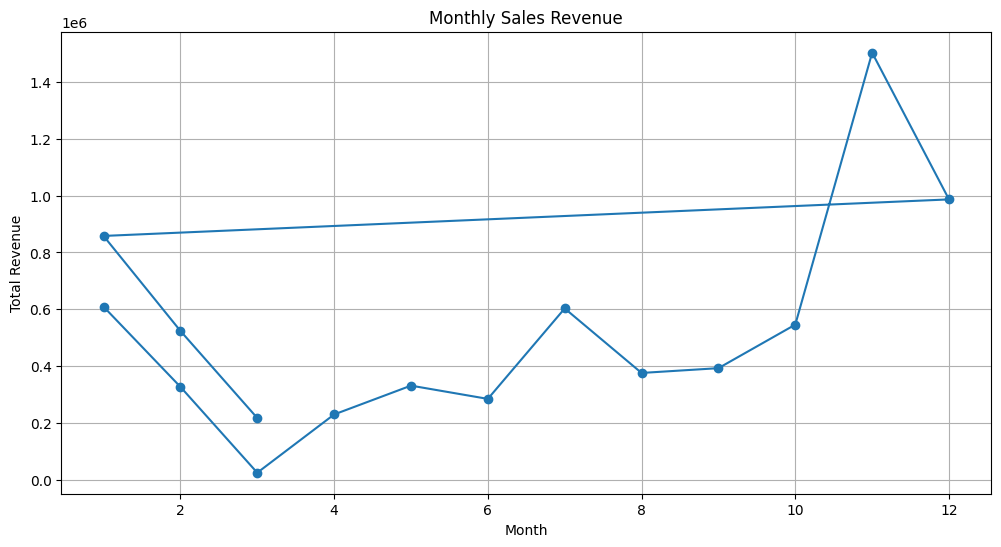

In [ ]:
# Convert date column to datetime
products_disc['date'] = pd.to_datetime(products_disc['date'])

# Extract month and year
products_disc['month'] = products_disc['date'].dt.month
products_disc['year'] = products_disc['date'].dt.year

# Group by month and year, summing only numerical columns
products_disc_grouped = products_disc.groupby(['year', 'month']).sum(numeric_only=True).reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(products_disc_grouped['month'], products_disc_grouped['total_revenue'], marker='o')
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

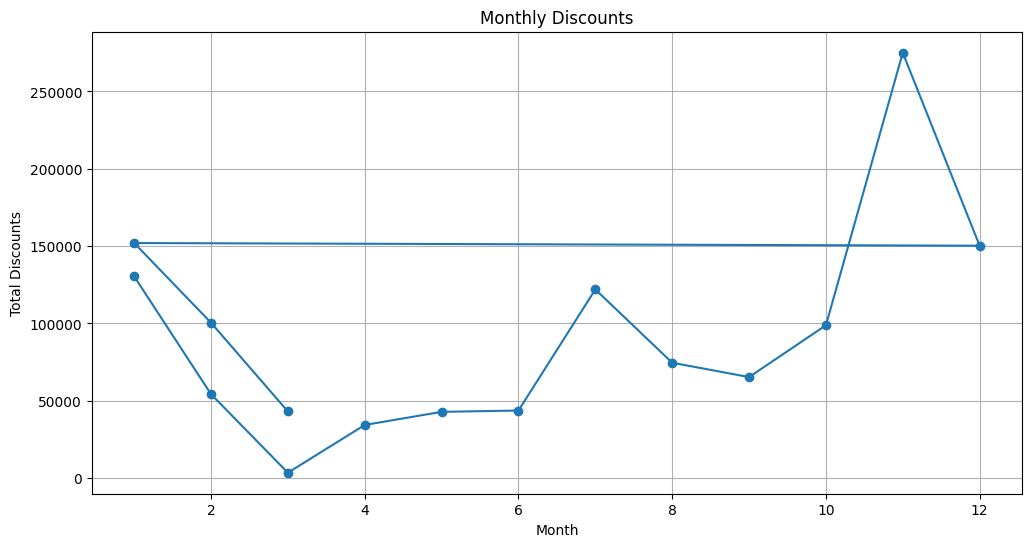

In [ ]:
# Convert date column to datetime
products_disc['date'] = pd.to_datetime(products_disc['date'])

# Extract month and year
products_disc['month'] = products_disc['date'].dt.month
products_disc['year'] = products_disc['date'].dt.year

# Group by month and year, summing only numerical columns
products_disc_grouped = products_disc.groupby(['year', 'month']).sum(numeric_only=True).reset_index()

# Plot the data for discounts
plt.figure(figsize=(12, 6))
plt.plot(products_disc_grouped['month'], products_disc_grouped['discounts'], marker='o')
plt.title('Monthly Discounts')
plt.xlabel('Month')
plt.ylabel('Total Discounts')
plt.grid(True)
plt.show()

In [ ]:
products_disc [['name','unit_pr_sold_price', 'regular_price', 'discounts']]

In [ ]:
# Count the number of discounted prices
discounted_count = products_disc[products_disc['discounts'] != 0].shape[0]

print(f"Number of discounted prices: {discounted_count}")

Number of discounted prices: 50975


In [ ]:
# Calculate discount percentage
products_disc['discount_percentage'] = (products_disc['discounts'] / products_disc['regular_price']) * 100

# Display the DataFrame
products_disc

,id,id_order,product_id,product_quantity,sku,unit_pr_sold_price,date,total_revenue,name,desc,regular_price,in_stock,type,discounts,month,year,discount_percentage
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50,1,2017,22.134776
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50,1,2017,22.134776
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,11.00,1,2017,18.035744
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,11.00,1,2017,18.035744
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,11.00,1,2017,18.035744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1647280,526003,0,1,NET0028,404.99,2018-03-12 15:59:19,404.99,Netgear Wifi Orbi System kit and satellite net...,System RBK50 Mesh WiFi network kit compact and...,429.99,0,1334,25.00,3,2018,5.814089
53227,1647425,526066,0,1,WAC0254,83.99,2018-03-12 17:45:42,83.99,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405,15.01,3,2018,15.161616
53228,1647495,526093,0,1,WAC0252,83.99,2018-03-12 18:32:29,83.99,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405,15.01,3,2018,15.161616
53229,1648399,526440,0,1,PAC2235,878.18,2018-03-13 15:08:27,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (...,NAS storage server integrated with special foc...,1124.98,1,12175397,246.80,3,2018,21.938168


In [ ]:
#Drop the columns that you don’t need so that they don’t confuse you.

In [ ]:
discounts = products_disc[['name',	'unit_pr_sold_price',	'regular_price', 'discounts']]

In [ ]:
discounts.sort_values(by='discounts', ascending=False).head(50)

In [ ]:
# Group by Product and calculate mean discount and total sales
grouped = discounts.groupby('name').agg({
    'discounts': 'mean',  # Calculate mean discount
    'unit_pr_sold_price': 'sum'  # Calculate total sales
}).reset_index()

grouped


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
# Plotting the data
plt.figure(figsize=(14, 7))
sns.barplot(x='name', y='discounts', data=grouped)
plt.xticks(rotation=90)
plt.title('Average Discount by Product_name')
plt.show()

In [ ]:
sampled_data = grouped.sample(n=1000)  # Adjust the number as needed
sns.barplot(x='name', y='unit_pr_sold_price', data=sampled_data)

In [ ]:
top_products = grouped.groupby('name').sum().nlargest(20, 'unit_pr_sold_price').reset_index()
sns.barplot(x='name', y='unit_pr_sold_price', data=top_products)

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x='name', y='unit_pr_sold_price', data=grouped)
plt.xticks(rotation=90)
plt.title('Total Sales by Product_name')
plt.show()

In [ ]:
discounts.sort_values(by='discounts', ascending=False).tail(50)

In [ ]:
discounts.sort_values(by='discounts', ascending=False).head(100).sum()

In [ ]:
# Calculate the difference
products_disc['price_difference'] = products_disc['regular_price'] - products_disc['unit_pr_sold_price']

In [ ]:
products_disc.drop(columns= ['discounts'])

In [ ]:
# Convert the date column to datetime
products_disc['date'] = pd.to_datetime(products_disc['date'])

In [ ]:
Disc_100 = products_disc[products_disc['price_difference'] > 100]
Disc_100

In [ ]:
products_disc.info()

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(products_disc['date'], products_disc['price_difference'], marker='o', linestyle='-')
plt.title('Difference Between Unit Price Sold and Regular Price Over Time')
plt.xlabel('date')
plt.ylabel('price difference')
plt.grid(True)
plt.show()